# Scatter Loss in Fabry-Perot Cavities

In [1]:
#%matplotlib inline
#import sympy as sym
import itertools
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.constants as const
from scipy.io import loadmat
#from __future__ import division


# Update the matplotlib configuration parameters:
#plt.rcParams.update({'font.size': 22, 'font.family': 'serif'})
plt.style.use("ranaIFO.mplstyle")

* Python Coding Style Guide: http://legacy.python.org/dev/peps/pep-0008/
* Python Colors: http://pythonhosted.org/ete2/reference/reference_svgcolors.html

In [2]:
def beamsizes(R1, R2, L, lambduh):
    """ Calculates beam spot radii for a 2 mirror Fabry-Perot Cavity
        given the radius of curvature of the two mirrors, 
        the cavity length, and the laser wavelength (all in SI units) """
    g1 = 1 - L/R1
    g2 = 1 - L/R2
    w1 = np.sqrt(L*lambduh/np.pi * np.sqrt(g2/(g1*(1-g1*g2))))
    w2 = np.sqrt(L*lambduh/np.pi * np.sqrt(g1/(g2*(1-g1*g2))))
    w0 = np.sqrt(L*lambduh/np.pi * np.sqrt(g1*g2*(1-g1*g2)/(g1 + g2 -2*g1*g2)**2))
    return w0, w1, w2

### Theoretical Estimates of Scatter Loss
$\mathcal{L}_{scatter} = (\frac{4 \pi \sigma}{\lambda})^2$

$G_{FP} = (\frac{t_1}{1 - r_1 r_2})^2$

### From Siegman, "Lasers", (1986)
$g_i = 1 - L/R_i$ 

$w_1^2 = \frac{L \lambda}{\pi}\sqrt{\frac{g_2}{g_1 (1 - g_1 g_2)}}$

$w_2^2 = \frac{L \lambda}{\pi}\sqrt{\frac{g_1}{g_2 (1 - g_1 g_2)}}$

## Plot the Loss Data

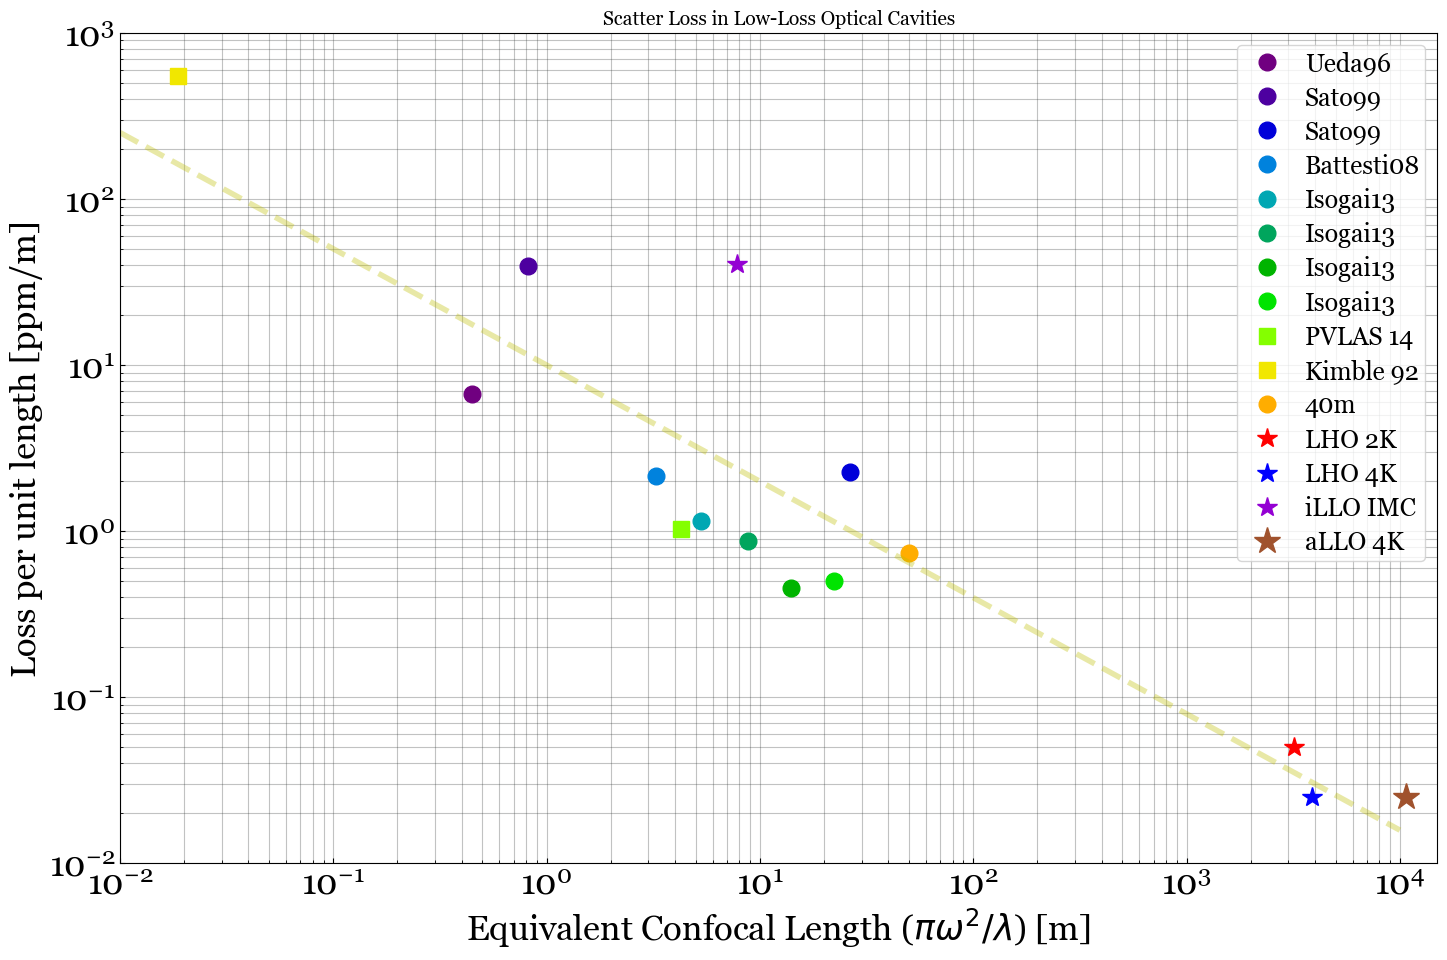

In [4]:
# load data from the Isogai 2013 paper (email from J. Miller)
data = loadmat('../../../../Data/figure8Data.mat',squeeze_me=True)

# cycle colors through the visible spectrum
plt.rcParams.update({'axes.prop_cycle': mpl.cycler(color = plt.cm.nipy_spectral(np.linspace(0.05,1,14)))})

fig = plt.figure(figsize=(17, 11), dpi=100)
for kk in range(0,np.size(data['len'])):
    plt.loglog(data['len'][kk], data['lossPerLen'][kk], 'o',
               ms=12, 
               label=data['labelList'][kk])

# PVLAS 2014 paper
# http://dx.doi.org/10.1364/OE.22.011570
w = 1.2e-3      # spot size
pvlas_lambda = 1064e-9  # laser wavelength
pvlas_x = np.pi * (w**2) / pvlas_lambda   # confocal wavelength
P_m = 1.7       # per mirror loss (ppm)
L = 3.303       # cavity length [m]
pvlas_l = 2*P_m / L   # round trip loss per unit length [ppm/m]
plt.loglog(pvlas_x, pvlas_l, 's', ms=11, label="PVLAS 14")


# G. Rempe, R. J. Thompson, H. J. Kimble, and R. Lalezari, Optics Letters 17, 363 (1992).
# A = 1.1 ppm / mirror, L = 0.004 m, lambda = 852 nm
L = 4e-3
kimble_x = np.pi * (0.0712e-3)**2 / (852e-9)
kimble_l = 2.2 / L
plt.loglog(kimble_x, kimble_l, 's', ms=11, label="Kimble 92")

# 40m 
# 28ppm rountrip loss was measured after cleaning
Lambda_40m = 1064e-9
w0, w1, w2 = beamsizes(np.inf, 57.5, 38, Lambda_40m)
conlen40m = np.pi*np.mean([w1,w2])**2/Lambda_40m
plt.loglog(conlen40m, 28/38, 'o', ms=12, label="40m")

# aLIGO IMC
# no useful loss measurements made as of Oct. 2014

LIGO_lambda = 1064e-9
# Kells 2007 - iLIGO
#plt.loglog(3201, 0.13,  '*', ms=15, label="LHO 2K")
#plt.loglog(3870, 0.028, '*', ms=15, label="LHO 4K")

# LHO 4K arm powers went up to ~2800 during S6
# http://ilog.ligo-wa.caltech.edu/ilog/pub/ilog.cgi?group=detector&date_to_view=04/09/2010&anchor_to_scroll_to=2010:04:09:01:46:06-rana
# also, see alignment paper by Dooley et al. (2013)
plt.loglog(3201, 100 / 2000, 'r*', ms=15, label="LHO 2K")
plt.loglog(3870, 100 / 4000, 'b*', ms=15, label="LHO 4K")

## iLIGO LLO IMC
# Loss study: http://ilog.ligo-wa.caltech.edu:7285/mLIGO/Cleaning_the_Mode_Cleaner
# ~250 ppm scatter loss per mirror
plt.loglog(7.829, 500 / 12.243, '*', ms=15, c='DarkViolet', label="iLLO IMC")

# aLIGO LLO 2014
# 
plt.loglog(np.pi*(0.06**2)/LIGO_lambda, 100 / 4000, '*', ms=20, c='Sienna', label="aLLO 4K")

Lx = np.logspace(-2,4,100)
plt.loglog(Lx, 10/Lx**(0.7), 'y--', lw=4, alpha = 0.35)

plt.ylabel(r'Loss per unit length [ppm/m]', fontsize=25);
plt.xlabel(r'Equivalent Confocal Length ($\pi \omega^2 / \lambda$) [m]'  , fontsize=25);
plt.title("Scatter Loss in Low-Loss Optical Cavities")
plt.legend(numpoints=1, fontsize = 18)
#plt.grid(color='gray', which='major', alpha=0.75, linestyle='solid',  linewidth=2)
#plt.grid(color='Lime', which='minor', alpha=0.20, linestyle='dashed', linewidth=1)
plt.xlim((1e-2 , 1.5e4));
plt.ylim((1e-2, 1e3));
plt.tick_params(labelsize=25)
plt.savefig("../../LossPerLength.pdf", bbox_inches='tight')
plt.show()

In [ ]:
# iLIGO arm buildup as a function of arm losses
T_PR  = 0.027
T_ITM = 0.028
T_ETM = 10e-6
Loss = np.linspace(0,200e-6,300)
rarm = (np.sqrt(1-T_ITM) - np.sqrt(1 - T_ETM - Loss)) / (1 - np.sqrt(1-T_ITM)*np.sqrt(1 - T_ETM - Loss))
G_PRC = T_PR / (1 + np.sqrt(1-T_PR)*rarm)**2

feg = plt.figure(figsize=(12, 7))
plt.plot(Loss*1e6, G_PRC, 'm', lw=3)

plt.xlabel(r'Rount-trip Arm Loss [ppm]', fontsize=18);
plt.ylabel(r'$G_{\rm PRC}$'  , fontsize=18);
plt.title("iLIGO PRC Gain v. Arm Loss");
#plt.legend(loc=3, fontsize=15)
#plt.xlim((1e-2 , 1.5e4));
plt.ylim((0, 150))
plt.show()

In [ ]:
# Adv. LIGO arm buildup as a function of arm losses
T_PR  = 0.03
T_ITM = 0.014
T_ETM = 5e-6
Loss = np.linspace(0,200e-6,300)
rarm = (np.sqrt(1-T_ITM) - np.sqrt(1 - T_ETM - Loss)) / (1 - np.sqrt(1-T_ITM)*np.sqrt(1 - T_ETM - Loss))
G_PRC = T_PR / (1 + np.sqrt(1-T_PR)*rarm)**2

feg = plt.figure(figsize=(12, 7))
plt.plot(Loss*1e6, G_PRC, 'b', lw=3)

plt.xlabel(r'Rount-trip Arm Loss [ppm]', fontsize=18);
plt.ylabel(r'$G_{\rm PRC}$'  , fontsize=18);
plt.title("Adv LIGO PRC Gain v. Arm Loss");
#plt.legend(loc=3, fontsize=15)
#plt.xlim((1e-2 , 1.5e4));
plt.ylim((0, 150))

plt.show()

In [ ]:
# Beam Size for the Kimble/Ramin experiment
lambduh = 852e-9
L = 4e-3
R1 = 0.173
R2 = 0.173
w0, w1, w2 = beamsizes(R1, R2, L, lambduh)

print("Kimble Spot Size is " + str(round(w1*1000,4)) + " mm")
print("Cavity Length is " + str(round(L*1000)) + " mm")
print("Equiv. Confocal Length is " + str(round(np.pi * w1**2 / lambduh, 3)) + " m")
print(" ")

# Beam Sizes for the iLIGO LHO 2K
# http://blue.ligo-wa.caltech.edu:8000/iLIGO/Optics_Inventory
lambduh = 1064e-9
L = 2000
R1 = 13.5e3   # average of the ITM RoC
R2 = 8.45e3   # average of the ETM Roc 
w0, w1, w2 = beamsizes(R1, R2, L, lambduh)

print("iLIGO H2 Spot Size is " + str(round(w1*1000,4)) + " mm")
print("iLIGO H2 Spot Size is " + str(round(w2*1000,4)) + " mm")
print("Cavity Length is " + str(round(L)) + " m")
print("Equiv. Confocal Length is " + str(round(np.pi * w1**2 / lambduh, 3)) + " m")
print(" ")

# Beam Sizes for the iLIGO LHO 4K
# http://blue.ligo-wa.caltech.edu:8000/iLIGO/Optics_Inventory
lambduh = 1064e-9
L = 4000
R1 = 13.75e3   # average of the ITM RoC
R2 = 7.29e3   # average of the ETM Roc 
w0, w1, w2 = beamsizes(R1, R2, L, lambduh)

print("iLIGO H1 Spot Size is " + str(round(w1*1000,4)) + " mm")
print("iLIGO H1 Spot Size is " + str(round(w2*1000,4)) + " mm")
print("Cavity Length is " + str(round(L)) + " m")
print("Equiv. Confocal Length is " + str(round(np.pi * w1**2 / lambduh, 3)) + " m")
print(" ")

# Beam Sizes for the iLIGO LLO IMC
# http://blue.ligo-wa.caltech.edu:8000/iLIGO/Optics_Inventory
lambduh = 1064e-9
L = const.c /(24.485e6)
R1 = 1e6   # average of the ITM RoC
R2 = 17.25   # average of the ETM Roc 
w0, w1, w2 = beamsizes(R1, R2, L, lambduh)

print("iLIGO L1 IMC Spot Size is " + str(round(w1*1000,4)) + " mm")
print("iLIGO L1 IMC Spot Size is " + str(round(w2*1000,4)) + " mm")
print("Cavity Length is " + str(round(L,3)) + " m")
print("Equiv. Confocal Length is " + str(round(np.pi * w1**2 / lambduh, 3)) + " m")
print(" ")

# Beam Sizes for the aLIGO LHO 4K
# galaxy.ligo.caltech.edu/optics
lambduh = 1064e-9
L = 4000
R1 = 1939.25   # average of the ITM RoC
R2 = 2240   # average of the ETM Roc 
w0, w1, w2 = beamsizes(R1, R2, L, lambduh)

print("aLIGO H1 Spot Size is " + str(round(w1*1000,4)) + " mm")
print("aLIGO H1 Spot Size is " + str(round(w2*1000,4)) + " mm")
print("aLIGO H1 Waist Size is " + str(round(w0*1000,4)) + " mm")
print("Cavity Length is " + str(round(L)) + " m")
print("Equiv. Confocal Length is " + str(round(np.pi * w1**2 / lambduh, 3)) + " m")
print(" ")

### Spot Size on Mirrors as a function of Roc

In [ ]:
R1 = np.linspace(1999,2150,3333)
w0,w1,w2 = beamsizes(R1, R1, 3995, 1064e-9)

feg = plt.figure(figsize=(12, 7))
plt.plot(R1, w1, 'b', lw=3)

plt.xlabel(r'Radius of Curvature [m]', fontsize=18);
plt.ylabel(r'Spot Size [m]'  , fontsize=18);
plt.title("Spot Size for a Symmetric Concentric Cavity");
#plt.legend(loc=3, fontsize=15)
#plt.xlim((1e-2 , 1.5e4));
plt.ylim((0, 0.15))

plt.show()